# _Python for Scientific Data Analysis_

## Homework #8 - Week 12 [INCOMPLETE] 
(_the full assignment will be due November 15_)


### 1. Project Update

* Please give me a **short** update on the progress of your class project.  In particular, I would like to see ...

- A description of the current status of your project
- Items where you are getting stuck (if any)/questions you may have
- Any plots or graphics you have produced beyond those from the previous homework.



### 2. Axis Formatting

 Start with the data arrays shown near the beginning of the part2a lecture notes along with their polynomial fits (second example plot):
 
 
 **NOW ...**
 
 **Adjust this plot** using information from the Axis Limits, Scaling, and Formatting section and elsewhere to produce the following modified plot:
 
 ![](./ex2_2revised2.png)
 
 
 
 Note the following things:
 
 * the axis labeling formats
 * tick formatting
 * scalings (linear or logarithmic)
 * spine thickness
 * transparency of the plotted points
 * linestyles
 * symbol sizes
 
 (also note that the exact points and functional fits will differ from mine since they are produced from random number generators)
 
 one note: with this revised plots, the y axis label on the second plot may run off the screen unless you resize the figure.  Doing the following allowed the label to appear for me:
 
 ```
 from matplotlib import rcParams
 rcParams['figure.figsize']=[12,8]
 ```

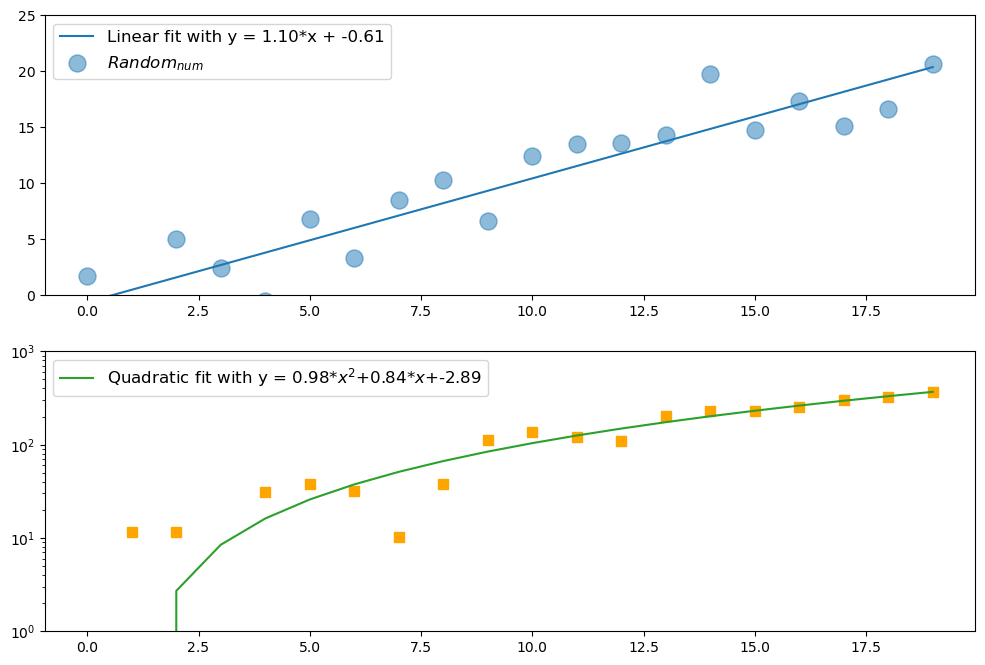

In [5]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
rcParams['figure.figsize']=[12,8]
xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
#y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
#a polynomial fit of degree one 

#yarray2 again varied +/- about x but with different amount of 20*random_number
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

#polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
#a convenience class to write the polynomial fit

#two rows, 1 column: i.e. the plots are vertically stacked
fig,axes=plt.subplots(2,1) 

#first subplot
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.5,label=r'$Random_{num}$')
axes[0].legend(loc='best',fontsize='large')
axes[0].set_ylim(0.0,25.0)

#second subplot
axes[1].plot(xarray,poly(xarray),c='tab:green',
 label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50)
axes[1].set_ylim(1.0, 1e3)
axes[1].set_yscale('log')
axes[1].legend(loc='best',fontsize='large')


### 3. Secondary/Twin Axes

Most stellar spectra are plotted with x units of wavelength (because the numbers go from smaller to larger, left to right).   

Read in the following stellar atmosphere model 'lte9800-3.5-NextGen.fits.gz'.  The native units are wavelength (in microns) and flux density in $ergs/s/cm^{2}/A$.

Plot the x axis in both wavelength and frequency units as follows:

 ![](./stellarspectrum.png)
 
 

 
The following piece of code will get you started (note, you will need to install AstroPy for this to work (AstroPy will be discussed in mid November)

```
from astropy.io import fits


primary_model=fits.open('./lte9800-3.5.NextGen.fits.gz')
                    
phead=primary_model[0].header
primary_spec=primary_model[0].data

primary_spec.shape
##primary_wvlh=primary_spec[:,0]
#prim

primary_wvlh=primary_spec[0,:]
primary_flux=primary_spec[1,:]
```


### 4. Twin Axes

From pirates now to something slightly more serious ...

Start with the Co2 concentration and year arrays in the lecture notes to Matplotlib Part2c.  I.e.

```
#generating data for main axis
CO2concentration=np.array([289,288,291,295,294,298,297,299,310,317,325,338,354,370,390.1,401,420]) #roughly estimated from NOAA
CO2years=np.array([1700,1750,1800,1850,1875,1900,1925,1950,1960,1970,1980,1990,2000,2005,2010,2015,2020])
```

And now read in global mean temperature anomaly data from [https://climate.copernicus.eu/climate-indicators/temperature]()

You can read in the data as follows:

```
a=np.loadtxt('climate_data.txt')
```
The year is the first column; the Berkeley, Hadley Centre, and NOAA measurements are columns 2, 3, and 4.

Use twin axes to reproduce this plot

![](./tempvco2.png)

Here, the green line is the mean temperature anomaly from three separate measurements, blue is the standard deviation of these measurements.
 
